***
***
***

<br>
<h1>Classification Based Analysis </h1>
<h3>Case: Apprentice Chef Inc.</h3><br>
Arundhishaan Kanagaraja | MSBA<br>
Hult International Business School<br>

GitHub: <a href = 'https://github.com/arundhishaan15/Apprentice-Chef-Inc.'> https://github.com/arundhishaan15/Apprentice-Chef-Inc. </a>

***
***
***

<h2>Section 1 | Dataset Exploration</h2>

Importing the following packages:
* pandas (as pd)
* numpy (as np)
* matplotlib.pyplot (as plt)
* seaborn (as sns)
* random (as rand)
* gender_guesser.detector (as gender)
* statsmodels.formula.api (as smf)
* train_test_split, cross_val_score (from sklearn.model_selection)
* sklearn.linear_model
* KNeighborsClassifier (from sklearn.neighbors)
* StandardScaler (from sklearn.preprocessing)
* LogisticRegression (from sklearn.linear_model)
* confusion_matrix (from sklearn.metrics)
* roc_auc_score (from sklearn.metrics)
* GridSearchCV (from sklearn.model_selection)
* make_scorer (from sklearn.metrics)

Ensemble Model Packages:
* RandomForestClassifier (from sklearn.ensemble)
* GradientBoostingClassifier (from sklearn.ensemble)

Cart Model Package:
* DecisionTreeClassifier (from sklearn.tree)
* export_graphviz (from sklearn.tree)
* StringIO (from sklearn.externals.six) 
* Image (from IPython.display)
* pydotplus                     

Then, loading the Apprentice Chef dataset into Python.

In [1]:
# importing libraries
import pandas as pd                                                   # data science essentials
import numpy as np                                                    # data science essentials
import matplotlib.pyplot as plt                                       # data visualization
import seaborn as sns                                                 # enhanced data visualization
import random as rand                                                 # random number generation
import gender_guesser.detector as gender                              # guess gender based on (given) name
import statsmodels.formula.api as smf                                 # linear regression (statsmodels)
from sklearn.model_selection import train_test_split, cross_val_score # train/test split & Cross Validation
import sklearn.linear_model                                           # Linear models
from sklearn.neighbors import KNeighborsClassifier                    # KNN for Classification
from sklearn.preprocessing import StandardScaler                      # standard scaler
from sklearn.linear_model import LogisticRegression                   # logistic regression
from sklearn.metrics import confusion_matrix                          # confusion matrix
from sklearn.metrics import roc_auc_score                             # auc score
from sklearn.model_selection import GridSearchCV                      # hyperparameter tuning
from sklearn.metrics import make_scorer                               # customizable scorer

# Ensemble Model Packages
from sklearn.ensemble import RandomForestClassifier                   # random forest
from sklearn.ensemble import GradientBoostingClassifier               # Gradient Boosting

# CART model packages
from sklearn.tree import DecisionTreeClassifier                       # classification trees
from sklearn.tree import export_graphviz                              # exports graphics
from sklearn.externals.six import StringIO                            # saves objects in memory
from IPython.display import Image                                     # displays on frontend
import pydotplus                                                      # interprets dot objects

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# setting random seed
rand.seed(a = 222)


# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
chef = pd.read_excel(file)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


<h3>Exploring the columns in the Dataset:</h3>

We can see that we our response variable is <strong>CROSS_SELL_SUCCESS</strong>. 
Here, we can see all the variables that are present in the dataset.

In [2]:
print(chef.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')


Exploring General information about each variable, including types and number of non-missing values.

Here we identified that FAMILY_NAME has missing values.

In [3]:
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REVENUE                       1946 non-null   float64
 1   CROSS_SELL_SUCCESS            1946 non-null   int64  
 2   NAME                          1946 non-null   object 
 3   EMAIL                         1946 non-null   object 
 4   FIRST_NAME                    1946 non-null   object 
 5   FAMILY_NAME                   1899 non-null   object 
 6   TOTAL_MEALS_ORDERED           1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH            1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE   1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED     1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT       1946 non-null   float64
 11  MOBILE_NUMBER                 1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON     1946 non-null   int64  
 13  CAN

Describing each quantitative column using descriptive statistics. <br>

Using describe() we can explore each variable whether they are discrete, continuous, interval, binary, count or categorical.

In [4]:
chef.describe().round(2)

REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED
count  1946.00             1946.00              1946.00              1946.0                      1946.00                    1946.00                  1946.00        1946.00                    1946.00                   1946.00                 1946.00    1946.00        1946.00      1946.00           1946.00          1946.00         1946.00              1946.00                       1946.00            1946.00             1946.00                  1946.00             1946.00               1946.00              1946.00
mean   2107.29                0.68                74.63                 4.9                         6.98                       5.38                    99.60           0.88                       1.40                      0.17                    0.71       5.52           1.48        11.33              1.49             2.97            0.36                 0.11                         35.41             150.56                4.44                     0.60                2.79                 13.51               106.43
std    1138.29                0.47                55.31                 2.5                         2.28                       3.04                    62.34           0.33                       1.55                      0.43                    0.45       0.58           0.53        13.57              2.32             2.74            0.48                 0.32                         26.58              49.45                1.55                     0.64                0.76                  2.33               181.01
min     131.00                0.00                11.00                 1.0                         1.00                       1.00                    10.33           0.00                       0.00                      0.00                    0.00       4.00           0.00         0.00              0.00             0.00            0.00                 0.00                          0.00              33.40                0.00                     0.00                1.00                  5.00                 0.00
25%    1350.00                0.00                39.00                 3.0                         5.00                       3.00                    72.00           1.00                       0.00                      0.00                    0.00       5.00           1.00         1.00              0.00             1.00            0.00                 0.00                         10.00             114.40                3.00                     0.00                2.00                 12.00                 0.00
50%    1740.00                1.00                60.00                 5.0                         7.00                       5.00                    94.16           1.00                       1.00                      0.00                    1.00       6.00           1.00         7.00              0.00             2.00            0.00                 0.00                         30.00             145.60                4.00                     1.00                3.00                 13.00                 0.00
75%    2670.00                1.00                95.00                 7.0                         8.00                       8.00                   117.29           1.00                       2.00                      0.00                    1.00       6.00           2.00        13.00              3.00             4.00            1.00                 0.00                         60.0

<h3>Indentifying Number of Missing Values</h3>

Here, we can see FAMILY_NAME has 47 missing values. 

In [5]:
chef.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
PC_LOGINS                        0
MOBILE_LOGINS                    0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

Imputing Missing Values of 'FAMILY_NAME' variable with 'Unknown'. 

In [6]:
# creating an imputation value
fill = 'Unknown'


# imputing 'FAMILY_NAME'
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)


# making sure all missing values have been taken care of
chef.isnull().any().sum()

0

<h3>Feature Engineering: Developing and working with Categorical Data</h3>

<strong>Part 1: Working with Email Address of customers</strong>

In this section, we would like to categorize into personal, professional and junk email based on the email domains.

Here we can see the number of customers with specific domain names.



In [7]:
# Splitting EMAIL

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_DOMAIN']


# concatenating EMAIL_DOMAIN with chef DataFrame
chef = pd.concat([chef, email_df['EMAIL_DOMAIN']],
                     axis = 1)


# printing value counts of EMAIL_DOMAIN
chef.loc[: ,'EMAIL_DOMAIN'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
mcdonalds.com        28
merck.com            28
jnj.com              28
cocacola.com         28
apple.com            27
nike.com             27
ge.org               26
dupont.com           26
ibm.com              26
microsoft.com        25
chevron.com          25
unitedhealth.com     24
exxon.com            24
travelers.com        24
boeing.com           23
caterpillar.com      22
pg.com               22
verizon.com          22
mmm.com              22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
unitedtech.com       18
goldmansacs.com      18
cisco.com            18
homedepot.com        17
intel.com            17
Name: EMAIL_DOMAIN, dtype: int64

Here, we are categorizing the email domains into professional, personal and junk. Then we take the count of each. 

We found that we have many customers with personal email.

In [8]:
# email domain types
PERSONAL_EMAIL_DOMAIN     = ['@gmail.com','@yahoo.com','@protonmail.com']

JUNK_EMAIL_DOMAIN         = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com', '@passport.com']

PROFESSIONAL_EMAIL_DOMAIN = ['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com','@chevron.com',
                             '@cisco.com','@cocacola.com','@disney.com','@dupont.com','@exxon.com','@ge.org',
                             '@goldmansacs.com','@homedepot.com','@ibm.com','@intel.com','@jnj.com','@jpmorgan.com',
                             '@mcdonalds.com','@merck.com','@microsoft.com','@nike.com','@pfizer.com','@pg.com',
                             '@travelers.com','@unitedtech.com','@unitedhealth.com','@verizon.com','@visa.com',
                             '@walmart.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['EMAIL_DOMAIN']:
    
    if '@' + domain in PERSONAL_EMAIL_DOMAIN:
        placeholder_lst.append('personal')
        

    elif '@' + domain in JUNK_EMAIL_DOMAIN:
        placeholder_lst.append('junk')
        
        
    elif '@' + domain in PROFESSIONAL_EMAIL_DOMAIN:
        placeholder_lst.append('professional')

        
    else:
            print('Unknown')


# concatenating with original DataFrame
chef['DOMAIN_GROUP'] = pd.Series(placeholder_lst)


# checking results
chef['DOMAIN_GROUP'].value_counts()

personal        861
professional    696
junk            389
Name: DOMAIN_GROUP, dtype: int64

<strong>Part 2: Working with NAME, FIRST_NAME to identify gender</strong>

We would use FIRST_NAME to identify the gender of the person. FAMILY_NAME is not used because it may not relate to a person's gender as compared to the FIRST_NAME. 

To save run-time the generated gender has been placed into the placeholder_lst. 

Here, we can see different gender types where gender_guesser was not able to guess most names.

In [9]:
# guessing gender based on NAME

# placeholder list
placeholder_lst = ['unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','male','male','female','mostly_female','mostly_female','mostly_female','unknown','male','male','unknown','male','unknown','male','unknown','unknown','female','andy','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','male','male','unknown','unknown','unknown','unknown','female','female','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','male','mostly_male','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','mostly_male','female','female','unknown','unknown','female','unknown','male','mostly_male','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','andy','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','female','male','female','male','female','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','male','unknown','unknown','unknown','male','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','male','male','unknown','female','unknown','unknown','male','unknown','male','male','male','male','unknown','male','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','male','male','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','female','mostly_female','female','unknown','unknown','unknown','female','female','male','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','male','female','female','unknown','unknown','unknown','male','male','unknown','male','male','male','unknown','unknown','unknown','unknown','unknown','mostly_female','unknown','unknown','unknown','unknown','male','male','unknown','unknown','unknown','unknown','female','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','mostly_male','male','male','male','male','male','female','unknown','unknown','male','male','male','male','unknown','male','male','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','mostly_male','unknown','unknown','unknown','unknown','male','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','male','male','unknown','unknown','male','male','male','male','male','male','male','male','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','male','male','unknown','unknown','unknown','unknown','unknown','unknown','male','male','unknown','female','unknown','unknown','unknown','unknown','unknown','unknown','male','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','male','unknown','unknown','unknown','unknown','mostly_female','mostly_female','mostly_female','unknown','unknown','unknown','male','male','unknown','male','male','male','unknown','male','male','unknown','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','female','unknown','unknown','unknown','female','female','unknown','male','unknown','unknown','female','female','unknown','unknown','unknown','unknown','unknown','unknown','male','male','unknown','unknown','male','unknown','unknown','male','unknown','unknown','male','unknown','unknown','unknown','male','unknown','unknown','mostly_male','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','male','unknown','unknown','unknown','unknown','male','male','female','male','unknown','unknown','unknown','male','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','male','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','male','unknown','unknown','unknown','unknown','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','male','unknown','male','unknown','male','unknown','unknown','unknown','unknown','male','male','unknown','unknown','unknown','unknown','unknown','unknown','male','male','male','male','unknown','unknown','unknown','unknown','female','male','male','male','male','male','male','unknown','unknown','unknown','unknown','male','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','female','male','male','unknown','male','female','unknown','unknown','mostly_male','male','unknown','male','unknown','male','male','unknown','unknown','unknown','unknown','unknown','mostly_female','male','male','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','female','unknown','female','male','male','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','female','unknown','male','unknown','male','unknown','unknown','male','unknown','female','male','unknown','unknown','unknown','unknown','unknown','unknown','male','male','male','male','male','male','male','male','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','male','male','male','male','male','unknown','unknown','male','female','unknown','unknown','male','unknown','female','male','male','male','male','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','andy','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','male','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','male','male','male','male','male','male','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','mostly_female','male','unknown','unknown','unknown','unknown','male','male','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','male','male','male','male','male','female','female','unknown','unknown','unknown','male','unknown','female','unknown','male','male','unknown','unknown','unknown','male','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','male','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','male','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown',
                   'male','unknown','male','unknown','male','unknown','unknown','male','male','male','unknown','unknown','unknown','unknown','unknown','male','male','male','male','male','mostly_male','mostly_male','mostly_male','mostly_male','unknown','unknown','unknown','male','male','unknown','unknown','male','unknown','unknown','male','male','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','mostly_male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','male','male','unknown','unknown','female','unknown','male','unknown','unknown','male','male','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','unknown','unknown','male','mostly_male','mostly_male','mostly_male','unknown','male','male','male','male','male','unknown','unknown','unknown','unknown','male','male','unknown','unknown','unknown','unknown','male','male','male','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','mostly_female','unknown','male','unknown','unknown','male','unknown','andy','unknown','unknown','unknown','unknown',
                   'female','female','male','unknown','unknown','male','male','unknown','mostly_male','female','unknown','unknown','male','unknown','male','male','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','andy','unknown','unknown','unknown','unknown','male','male','male','unknown','unknown','unknown','unknown','unknown','unknown','male','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','male','unknown','unknown','male','male','unknown','mostly_male','mostly_male','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','male','male','unknown','unknown','female','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','male','male','unknown','unknown','unknown','male','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','male','male','male','male','male','male','male','mostly_male','mostly_male','unknown','male','unknown','unknown','unknown','female','unknown','unknown','male','andy','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','mostly_female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','male','unknown','male','unknown','unknown','unknown','male','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','male','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','male','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','andy','unknown','unknown','unknown','unknown','unknown','unknown','andy','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','female','unknown','mostly_female','mostly_female','unknown','unknown','unknown','unknown','unknown','female','male','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','male','male','unknown','unknown','unknown','female','unknown','female','female','unknown','unknown','unknown','male','male','male','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','male','male','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','andy','unknown','male','unknown','female','female','unknown','male','unknown','unknown','male','unknown','female','unknown','unknown','unknown','male','unknown','female','unknown','male','unknown','female','male','unknown','unknown','unknown','female','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','female','female','unknown','unknown','unknown','unknown','unknown','male','unknown','male','male','male','unknown','male','unknown','male','unknown','male','mostly_female','male','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','male','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','male','female','unknown','female','unknown','unknown','male','male','male','unknown','unknown','male','unknown','unknown','female','unknown','unknown','unknown','unknown','male','mostly_male','mostly_female','mostly_female','female','unknown','unknown','unknown','unknown','male','male','female','unknown','male','unknown','unknown','unknown','female','unknown','unknown','unknown','male','unknown','male','unknown','male','unknown','male','unknown','unknown','unknown','unknown','unknown','male','female','female','male','female','unknown','male','male','unknown','unknown','male','female','female','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','female','unknown','male','male','unknown','female','unknown','mostly_female','male','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','male','male','male','mostly_male','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','female','unknown','female','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','mostly_male','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','female','female','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','male','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','male','female','unknown','unknown','unknown','unknown','unknown','unknown','male','female','female','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','andy','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','mostly_female','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','female','female','unknown','female','female','female','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','female','male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','mostly_female','unknown','unknown','unknown','unknown','unknown','unknown','female','unknown','unknown','female','male','male','mostly_male','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','unknown','male','unknown','unknown','male','unknown','female','female','unknown','male','unknown','unknown','unknown','unknown','unknown','unknown','mostly_female','unknown','unknown']


# looping to guess gender
#for name in chef['FIRST_NAME']:
#    guess = gender.Detector().get_gender(name)
#    print(guess)
#    placeholder_lst.append(guess)


# converting list into a series
chef['GENDER_GUESS_FIRST_NAME'] = pd.Series(placeholder_lst)


# checking results
chef['GENDER_GUESS_FIRST_NAME'].value_counts()

unknown          1385
male              381
female            125
mostly_male        24
mostly_female      21
andy               10
Name: GENDER_GUESS_FIRST_NAME, dtype: int64

Since there are very small number of mostly_male and mostly_female we can group them with male and female respectively.

andy can be added to 'Unknown' as it is small data and we can't be so sure if they are unisex and it is better to avoid making that decision. 

In [10]:
# Replace values
chef['GENDER_GUESS_FIRST_NAME'] = chef["GENDER_GUESS_FIRST_NAME"].replace({"mostly_male": "male", 
                                                                           "mostly_female": "female",
                                                                           "andy": "unknown"})

# checking results
chef['GENDER_GUESS_FIRST_NAME'].value_counts()

unknown    1395
male        405
female      146
Name: GENDER_GUESS_FIRST_NAME, dtype: int64

<strong>Part 3: One Hot Encoding the Categorical Variables </strong>

We could use one hot encoding on DOMAIN_GROUP and GENDER_GUESS_FIRST_NAME categorical variables and later choose features of interest. 

In [11]:
# one hot encoding categorical variables
one_hot_DOMAIN_GROUP            = pd.get_dummies(chef['DOMAIN_GROUP'])
one_hot_GENDER_GUESS_FIRST_NAME = pd.get_dummies(chef['GENDER_GUESS_FIRST_NAME'])


# dropping categorical variables after they've been encoded
chef = chef.drop('DOMAIN_GROUP', axis = 1)
chef = chef.drop('GENDER_GUESS_FIRST_NAME', axis = 1)


# joining codings together
chef = chef.join([one_hot_DOMAIN_GROUP, one_hot_GENDER_GUESS_FIRST_NAME])

<h3>Understanding the Features in the Dataset</h3>

In [12]:
"""
# CONTINUOUS OR INTERVAL
REVENUE
AVG_TIME_PER_SITE_VISIT (could be here - What is the unit?)
WEEKLY_PLAN (could be interval - As we calculate for 12 months: 0-52 weeks)
FOLLOWED_RECOMMENDATIONS_PCT
AVG_PREP_VID_TIME
MEDIAN_MEAL_RATING


# BINARY
CROSS_SELL_SUCCESS
MOBILE_NUMBER
TASTES_AND_PREFERENCES (could be here Yes/No at signup)
PACKAGE_LOCKER 
REFRIGERATED_LOCKER

# COUNT
TOTAL_MEALS_ORDERED  
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED (could be here - If list unchanged throughout, could be interval)
CANCELLATIONS_BEFORE_NOON (could be interval - 0 to [365 - holidays])
CANCELLATIONS_AFTER_NOON (could be interval - 0 to [365 - holidays])
PC_LOGINS 
MOBILE_LOGINS
EARLY_DELIVERIES (could be interval - 0-365 - Do they sell on holidays?)
LATE_DELIVERIES (could be interval - 0-365 - Do they sell on holidays?)
LARGEST_ORDER_SIZE
MASTER_CLASSES_ATTENDED
AVG_CLICKS_PER_VISIT (could be here : Count of clicks)
TOTAL_PHOTOS_VIEWED (could be here : Count of clicks)

# CATEGORICAL
DOMAIN_GROUP
EMAIL_DOMAIN
GENDER_GUESS_FIRST_NAME

# DISCRETE
NAME
EMAIL
FIRST_NAME
FAMILY_NAME

"""

'\n# CONTINUOUS OR INTERVAL\nREVENUE\nAVG_TIME_PER_SITE_VISIT (could be here - What is the unit?)\nWEEKLY_PLAN (could be interval - As we calculate for 12 months: 0-52 weeks)\nFOLLOWED_RECOMMENDATIONS_PCT\nAVG_PREP_VID_TIME\nMEDIAN_MEAL_RATING\n\n\n# BINARY\nCROSS_SELL_SUCCESS\nMOBILE_NUMBER\nTASTES_AND_PREFERENCES (could be here Yes/No at signup)\nPACKAGE_LOCKER \nREFRIGERATED_LOCKER\n\n# COUNT\nTOTAL_MEALS_ORDERED  \nUNIQUE_MEALS_PURCH\nCONTACTS_W_CUSTOMER_SERVICE\nPRODUCT_CATEGORIES_VIEWED (could be here - If list unchanged throughout, could be interval)\nCANCELLATIONS_BEFORE_NOON (could be interval - 0 to [365 - holidays])\nCANCELLATIONS_AFTER_NOON (could be interval - 0 to [365 - holidays])\nPC_LOGINS \nMOBILE_LOGINS\nEARLY_DELIVERIES (could be interval - 0-365 - Do they sell on holidays?)\nLATE_DELIVERIES (could be interval - 0-365 - Do they sell on holidays?)\nLARGEST_ORDER_SIZE\nMASTER_CLASSES_ATTENDED\nAVG_CLICKS_PER_VISIT (could be here : Count of clicks)\nTOTAL_PHOTOS_VIEWED

<h3>Section 2 | Feature Engineering </h3>

<strong>Part 1: Outlier Analysis </strong>

Histograms of all the variables in the dataset were produced. Also, by checking quantiles and exploring the figures, outliers are detected. xlim() and ylim() functions or saving the figure to the directory for viewing were used in the process of identifying the outliers. 

Setting outlier thresholds and creating outlier flag columns.

In [13]:
# setting outlier thresholds
WEEKLY_PLAN_hi                  = 15
FOLLOWED_RECOMMENDATIONS_PCT_hi70 = 70 
AVG_PREP_VID_TIME_lo            = 90
AVG_PREP_VID_TIME_hi            = 183
MEDIAN_MEAL_RATING_lo           = 2
MEDIAN_MEAL_RATING_hi           = 4
CANCELLATIONS_BEFORE_NOON_hi    = 4
CANCELLATIONS_AFTER_NOON_lo     = 1
CANCELLATIONS_AFTER_NOON_hi     = 2
MASTER_CLASSES_ATTENDED_hi      = 1

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

#WEEKLY_PLAN 

chef['out_WEEKLY_PLAN'] = 0
condition_hi = chef.loc[0:,'out_WEEKLY_PLAN'][chef['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]

chef['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#FOLLOWED_RECOMMENDATIONS_PCT

chef['out_FOLLOWED_RECOMMENDATIONS_PCT70'] = 0
condition_hi = chef.loc[0:,'out_FOLLOWED_RECOMMENDATIONS_PCT70'][chef['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_hi70]

chef['out_FOLLOWED_RECOMMENDATIONS_PCT70'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#AVG_PREP_VID_TIME

chef['out_AVG_PREP_VID_TIME'] = 0
condition_hi = chef.loc[0:,'out_AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]
condition_lo = chef.loc[0:,'out_AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_lo]

chef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

chef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#MEDIAN_MEAL_RATING

chef['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = chef.loc[0:,'out_MEDIAN_MEAL_RATING'][chef['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]
condition_hi = chef.loc[0:,'out_MEDIAN_MEAL_RATING'][chef['MEDIAN_MEAL_RATING'] < MEDIAN_MEAL_RATING_lo]

chef['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

chef['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#CANCELLATIONS_BEFORE_NOON 

chef['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = chef.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][chef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

chef['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#CANCELLATIONS_AFTER_NOON

chef['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = chef.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]
condition_lo = chef.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON'] < CANCELLATIONS_AFTER_NOON_lo]

chef['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

chef['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#MASTER_CLASSES_ATTENDED

chef['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = chef.loc[0:,'out_MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi]

chef['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)



<strong>Part 2: Trend Based Featuring</strong>

Scatterplots and Boxplots were plotted with CROSS_SELL_SUCCESS, response variable to see trend based changes. Also, by checking quantiles and exploring the figures, trends are detected. xlim() and ylim() functions or saving the figure to the directory for viewing could be used in the process of identifying the outliers. In some plots below, xlim() and ylim() functions are used to see the trend changes. 

A few boxplots that show good relation with CROSS_SELL_SUCCESS are shown.

BOXPLOT 1: FOLLOWED_RECOMMENDATIONS_PCT

All the customers who followed our meal recommendations more than 20% of the time on the web or mobile platform are extremely likely to lead to a CROSS SELL SUCCESS on our Wine promotion. These customers exhibit trust on our recommendations so these are customers we would want to target. 

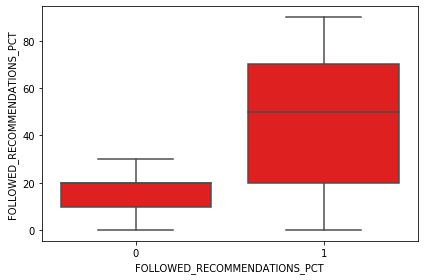

In [14]:
# FOLLOWED_RECOMMENDATIONS_PCT

sns.boxplot(chef['CROSS_SELL_SUCCESS'],
             chef['FOLLOWED_RECOMMENDATIONS_PCT'],
             color = 'r')

plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

plt.tight_layout()
plt.show()

In [15]:
customers = chef[(chef['CROSS_SELL_SUCCESS']==1) & (chef['FOLLOWED_RECOMMENDATIONS_PCT']>20)]
cus_count = customers['FOLLOWED_RECOMMENDATIONS_PCT'].count()

print(f"""
The number of customers who followed meal recommendation more than 20% of time 
with successful promotion are {cus_count} customers. """)


The number of customers who followed meal recommendation more than 20% of time 
with successful promotion are 877 customers. 


This is about 45% of total customers.

BOXPLOT 2: CANCELLATIONS_BEFORE_NOON

Adjusting ylim() in the graph, it was found that those who cancelled more than 1 meal before noon are more likely to lead to a cross sell success. Since we give a full refund for those who cancel before noon they may like our service and support. They may tend to be loyal customers. This may be the cause of a higher cross sell success after they've seen our cancellation before noon policy. We could target these customers as well.



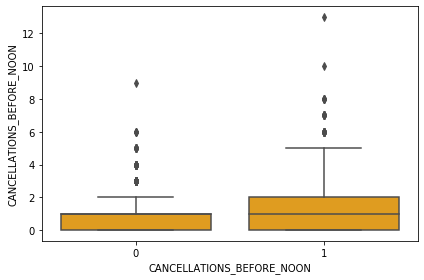

In [16]:
# CANCELLATIONS_BEFORE_NOON

sns.boxplot(chef['CROSS_SELL_SUCCESS'],
             chef['CANCELLATIONS_BEFORE_NOON'],
             color = 'orange')

plt.xlabel('CANCELLATIONS_BEFORE_NOON')

plt.tight_layout()
plt.show()

In [17]:
customers = chef[(chef['CROSS_SELL_SUCCESS']==1) & (chef['personal'] == 1)]
cus_count = customers['personal'].count()

print(f"""
The number of customers who had atleast used our cancellation before noon policy and
those with cross sell success are {cus_count} customers. """)



The number of customers who had atleast used our cancellation before noon policy and
those with cross sell success are 602 customers. 


This is about 47% of the total customers.

BOXPLOT 3: AVG_CLICKS_PER_VISIT

In this boxplot, we can see that the median customers is higher who have more average clicks on the web and mobile platform when there is cross sell failure. This shows that there requires improvements made on engagement in the platform and support good promotion program.

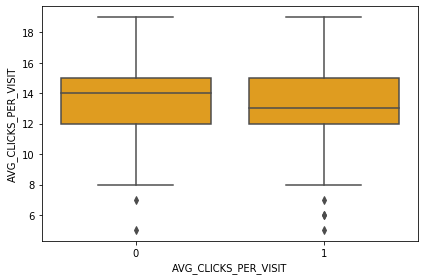

In [18]:
# AVG_CLICKS_PER_VISIT

sns.boxplot(chef['CROSS_SELL_SUCCESS'],
             chef['AVG_CLICKS_PER_VISIT'],
             color = 'orange')

plt.xlabel('AVG_CLICKS_PER_VISIT')

plt.tight_layout()
plt.show()

Setting Trend based thresholds and creating flag columns.

In [19]:
# setting trend-based threshold

# Features from Scatterplots
TOTAL_MEALS_ORDERED_change_hi_50meal = 50  
AVG_CLICKS_PER_VISIT_change_lo       = 15   
CANCELLATIONS_BEFORE_NOON_change_at  = 0    
MASTER_CLASSES_ATTENDED_change_at    = 0      

#######################################################################################################################

# Important Features from boxplot

FOLLOWED_RECOMMENDATIONS_PCT_imphi   = 20    # Change in Trend above point
FOLLOWED_RECOMMENDATIONS_PCT_implo   = 20    # Change in Trend below point

WEEKLY_PLAN_imphi                    = 13    # Change in Trend

CANCELLATIONS_BEFORE_NOON_imphi      = 1     # Change in Trend 

AVG_CLICKS_PER_VISIT_impat13         = 13    # Keep only one Feature
AVG_CLICKS_PER_VISIT_impat14         = 14    # Change at the point

REVENUE_implo                        = 1368  # Change in Trend below the point   
REVENUE_imphi                        = 2660  # Change in Trend above the point

TOTAL_PHOTOS_VIEWED_imphi            = 165   # Change in Trend

AVG_PREP_VID_TIME_impat              = 145   # Change in Trend at the point
AVG_PREP_VID_TIME_implo              = 116   # Change in Trend below the point


##############################################################################
## Feature Engineering (trend changes)                                      ##
##############################################################################

# Features from Scatterplots

# TOTAL_MEALS_ORDERED above 50 meals
chef['changehi50meal_TOTAL_MEALS_ORDERED'] = 0
condition = chef.loc[0:,'changehi50meal_TOTAL_MEALS_ORDERED'][chef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_change_hi_50meal]

chef['changehi50meal_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# AVG_CLICKS_PER_VISIT
chef['changelo_AVG_CLICKS_PER_VISIT'] = 0
condition = chef.loc[0:,'changelo_AVG_CLICKS_PER_VISIT'][chef['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_change_lo]

chef['changelo_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# CANCELLATIONS_BEFORE_NOON
chef['changeat_CANCELLATIONS_BEFORE_NOON'] = 0
condition = chef.loc[0:,'changeat_CANCELLATIONS_BEFORE_NOON'][chef['CANCELLATIONS_BEFORE_NOON'] == CANCELLATIONS_BEFORE_NOON_change_at]

chef['changeat_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# MASTER_CLASSES_ATTENDED
chef['changeat_MASTER_CLASSES_ATTENDED'] = 0
condition = chef.loc[0:,'changeat_MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED'] == MASTER_CLASSES_ATTENDED_change_at]

chef['changeat_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

##########################################################################################################################

# Features from Boxplot

# FOLLOWED_RECOMMENDATIONS_PCT_imphi = 20 #Keep only one feature

chef['changeimphi_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition = chef.loc[0:,'changeimphi_FOLLOWED_RECOMMENDATIONS_PCT'][chef['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_imphi]

chef['changeimphi_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# FOLLOWED_RECOMMENDATIONS_PCT_implo = 20

chef['changeimplo_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition = chef.loc[0:,'changeimplo_FOLLOWED_RECOMMENDATIONS_PCT'][chef['FOLLOWED_RECOMMENDATIONS_PCT'] < FOLLOWED_RECOMMENDATIONS_PCT_implo]

chef['changeimplo_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# WEEKLY_PLAN_imphi = 13

chef['changeimphi_WEEKLY_PLAN'] = 0
condition = chef.loc[0:,'changeimphi_WEEKLY_PLAN'][chef['WEEKLY_PLAN'] > WEEKLY_PLAN_imphi]

chef['changeimphi_WEEKLY_PLAN'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# CANCELLATIONS_BEFORE_NOON_imphi = 1 

chef['changeimphi_CANCELLATIONS_BEFORE_NOON'] = 0
condition = chef.loc[0:,'changeimphi_CANCELLATIONS_BEFORE_NOON'][chef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_imphi]

chef['changeimphi_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# AVG_CLICKS_PER_VISIT_impat13 = 13 #Keep only one feature

chef['changeimpat13_AVG_CLICKS_PER_VISIT'] = 0
condition = chef.loc[0:,'changeimpat13_AVG_CLICKS_PER_VISIT'][chef['AVG_CLICKS_PER_VISIT'] == AVG_CLICKS_PER_VISIT_impat13]

chef['changeimpat13_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# AVG_CLICKS_PER_VISIT_impat14 = 14

chef['changeimpat14_AVG_CLICKS_PER_VISIT'] = 0
condition = chef.loc[0:,'changeimpat14_AVG_CLICKS_PER_VISIT'][chef['AVG_CLICKS_PER_VISIT'] == AVG_CLICKS_PER_VISIT_impat14]

chef['changeimpat14_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# REVENUE_implo = 1368

chef['changeimplo_REVENUE'] = 0
condition = chef.loc[0:,'changeimplo_REVENUE'][chef['REVENUE'] < REVENUE_implo]

chef['changeimplo_REVENUE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# REVENUE_imphi = 2660 #Keep only one feature

chef['changeimphi_REVENUE'] = 0
condition = chef.loc[0:,'changeimphi_REVENUE'][chef['REVENUE'] > REVENUE_imphi]

chef['changeimphi_REVENUE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# TOTAL_PHOTOS_VIEWED_imphi = 165

chef['changeimphi_TOTAL_PHOTOS_VIEWED'] = 0
condition = chef.loc[0:,'changeimphi_TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_imphi]

chef['changeimphi_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# AVG_PREP_VID_TIME_impat = 145

chef['changeimpat_AVG_PREP_VID_TIME'] = 0
condition = chef.loc[0:,'changeimpat_AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME'] == AVG_PREP_VID_TIME_impat]

chef['changeimpat_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# AVG_PREP_VID_TIME_implo = 116

chef['changeimplo_AVG_PREP_VID_TIME'] = 0
condition = chef.loc[0:,'changeimplo_AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_implo]

chef['changeimplo_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


<h3>Section 3 | Modelling Techniques</h3>

While preparing the explanatory and response variable for training/testing, the following were confirmed.

1. Prepare the explanatory variable data by dropping <strong>'CROSS_SELL_SUCCESS'</strong>, <strong>'NAME'</strong>, <strong>'EMAIL'</strong>, <strong>'FIRST_NAME'</strong>, <strong>'FAMILY_NAME'</strong>, and <strong>'EMAIL_DOMAIN'</strong> from the dataset. And, the necessary features are kept as shown in the candidate dictionary.
2. Prepare the response variable data by subsetting <strong>'CROSS_SELL_SUCCESS'</strong> (save as <strong>chef_target</strong>)

<h5><strong>Part 1: OLS Model (Using it as a base model to identify variables using p-values)</strong></h5>

OLS Model (Logistic Regression):

In the OLS model, customers using personal email is removed as from different feature selection methods, it gave an inference that cross selling of wine is mostly preferred by customers with professional email and customers categorized with junk email. And, customers whose gender is 'unknown' is also removed, keeping 'male' and 'female' variables. Thus, removing 'personal' and 'unknown' variables the logistic regression was run. Thus we have a full set of X_variables (logit_full) in the candidate dictionary.

Then best features are found using backward selection method by looking at their p-values and these features are added to candidate dictionary as significant variables (logit_sig).  

After including all featured values that come from Outliers and Trend Analysis into the logistic regression, best features are selected using backward selection called 'logit_feat_sig' in the candidate dictionary.


<strong>Candidate Dictionary (X_variables) </strong>

These x_variable sets are obtained by looking at SelectKBest (Chi2) feature selection, feature importances from Extra tree classifier (Extremely Randomized Trees), p-values from logistic regression, and positive and negative set of Pearson's correlation variables. 

Using the above sets on the models and after finding the best set that gives higher performance, further analysis is done to combine new features into the best set to get 'best_features' set in the dictionary.

From the analysis 'logit_sig' was the best performing variables set, and 'TOTAL_PHOTOS_VIEWED' feature was added to obtain the 'best_features' variable set. Looking at feature importances using other variable sets helped in identifying this variable.  

In [20]:
# explanatory variable sets

candidate_dict = {

  # Best Features
  'best_features'   :['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
                   'MOBILE_LOGINS', 'FOLLOWED_RECOMMENDATIONS_PCT', 'junk', 'professional', 'female', 'male',
                   'TOTAL_PHOTOS_VIEWED'],

  # full model without featured variables
  'logit_full'     : ['REVENUE','TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
                   'PRODUCT_CATEGORIES_VIEWED','AVG_TIME_PER_SITE_VISIT','MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES','PC_LOGINS','MOBILE_LOGINS','WEEKLY_PLAN',
                   'EARLY_DELIVERIES','LATE_DELIVERIES','PACKAGE_LOCKER','REFRIGERATED_LOCKER',
                   'FOLLOWED_RECOMMENDATIONS_PCT','AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED',
                   'MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED','junk','professional','female','male'],
 
    
 # significant variables only
 'logit_sig'      : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
                   'MOBILE_LOGINS', 'FOLLOWED_RECOMMENDATIONS_PCT', 'junk', 'professional', 'female', 'male'],

 # significant variables only with all featured variables
 'logit_feat_sig' : ['TOTAL_MEALS_ORDERED','MOBILE_NUMBER','TASTES_AND_PREFERENCES','MOBILE_LOGINS','WEEKLY_PLAN',
                     'FOLLOWED_RECOMMENDATIONS_PCT','AVG_PREP_VID_TIME','MASTER_CLASSES_ATTENDED','AVG_CLICKS_PER_VISIT',
                     'out_WEEKLY_PLAN','out_AVG_PREP_VID_TIME','out_MEDIAN_MEAL_RATING','out_CANCELLATIONS_AFTER_NOON',
                     'out_MASTER_CLASSES_ATTENDED','changehi50meal_TOTAL_MEALS_ORDERED','changelo_AVG_CLICKS_PER_VISIT',
                     'changeat_CANCELLATIONS_BEFORE_NOON','changeat_MASTER_CLASSES_ATTENDED',
                     'changeimphi_FOLLOWED_RECOMMENDATIONS_PCT','changeimplo_FOLLOWED_RECOMMENDATIONS_PCT',
                     'changeimphi_CANCELLATIONS_BEFORE_NOON','changeimplo_AVG_PREP_VID_TIME','junk','professional',
                     'female','male'],  
    
    
 # SelectKBest Scikit Learn Feature selection
 'features_Chi2'  : ['FOLLOWED_RECOMMENDATIONS_PCT','changeimphi_FOLLOWED_RECOMMENDATIONS_PCT','junk',
                     'out_FOLLOWED_RECOMMENDATIONS_PCT70','CANCELLATIONS_BEFORE_NOON','TOTAL_PHOTOS_VIEWED',
                     'changeimplo_FOLLOWED_RECOMMENDATIONS_PCT','professional','changeimphi_CANCELLATIONS_BEFORE_NOON',
                     'AVG_PREP_VID_TIME','REVENUE','changeat_CANCELLATIONS_BEFORE_NOON','male','female'],
     
     
 # Feature importance using Extra Tree classifier (Extremely Randomized Trees)
 'Extra_featimp'      : ['FOLLOWED_RECOMMENDATIONS_PCT','changeimphi_FOLLOWED_RECOMMENDATIONS_PCT','junk','professional',
                     'changeimphi_CANCELLATIONS_BEFORE_NOON','changeimplo_FOLLOWED_RECOMMENDATIONS_PCT',
                     'CONTACTS_W_CUSTOMER_SERVICE','UNIQUE_MEALS_PURCH','REVENUE','out_FOLLOWED_RECOMMENDATIONS_PCT70',
                     'TOTAL_MEALS_ORDERED','AVG_PREP_VID_TIME','AVG_TIME_PER_SITE_VISIT','WEEKLY_PLAN'],
     
     
 # Positively Correlated variables only
 'p_corr_var'      : ['FOLLOWED_RECOMMENDATIONS_PCT','changeimphi_FOLLOWED_RECOMMENDATIONS_PCT',
                      'out_FOLLOWED_RECOMMENDATIONS_PCT70','professional','changeimphi_CANCELLATIONS_BEFORE_NOON',
                      'CANCELLATIONS_BEFORE_NOON','male','MOBILE_NUMBER','TASTES_AND_PREFERENCES','REFRIGERATED_LOCKER',
                      'out_CANCELLATIONS_BEFORE_NOON','out_CANCELLATIONS_AFTER_NOON'],
    
    
 # Negatively Correlated variables only
 'n_corr_var'      : ['AVG_CLICKS_PER_VISIT','out_AVG_PREP_VID_TIME','MOBILE_LOGINS','changeat_MASTER_CLASSES_ATTENDED',
                      'CANCELLATIONS_AFTER_NOON','unknown','female','changeat_CANCELLATIONS_BEFORE_NOON',
                      'changeimplo_FOLLOWED_RECOMMENDATIONS_PCT','junk']
     
     
}


<br>
<strong>User-Defined Functions</strong><br>
Run the following code to load the user-defined functions used throughout this Notebook.

In [21]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img


########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

<h5> <strong>Part 2: Using Scikit Learn Models </strong></h5>

Now, we are preparing the training and testing data. The test_size has been set to 0.25 throughout the analysis. And the random_state is 222.

In [22]:
# applying modelin scikit-learn

# preparing x-variables
chef_data = chef.loc[ : , candidate_dict['best_features']]


# preparing response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']


# running train/test split 
X_train,X_test,y_train,y_test = train_test_split(chef_data,
                                                chef_target,
                                                test_size = 0.25,
                                                random_state = 222,
                                                stratify = chef_target)

<strong>Model 1: Logistic Regression </strong>

In this model, we are using default hyperparameters with max_iter = 1000. 

In [23]:
# INSTANTIATING a logistic regression model
logr = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            max_iter= 1000,
                            random_state = 222)


# FITTING the training data
logr_fit = logr.fit(X_train, y_train)


# PREDICTING based on the testing set
logr_pred = logr_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logr_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logr_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = logr_pred).round(4))


logr_train_score = logr_fit.score(X_train, y_train).round(4)
logr_test_score  = logr_fit.score(X_test, y_test).round(4)
logr_AUC_score   = roc_auc_score(y_true  = y_test,
                                   y_score = logr_pred).round(4)


Training ACCURACY: 0.7752
Testing  ACCURACY: 0.7515
AUC Score        : 0.7139


This shows the confusion matrix for the model which can be compared with other models.

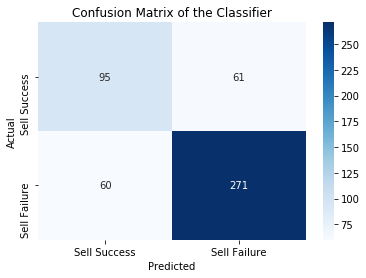

In [24]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logr_pred,
          labels = ['Sell Success', 'Sell Failure'])

Now, we are tuning the model using GridSearchCV 3 Fold Cross Validation to see results. The optimal set from GridSearchCV has been used. 

In [25]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
logr_tuned = LogisticRegression(solver='lbfgs',
                                max_iter = 1000,
                                C=0.6,
                                random_state=222, 
                                warm_start=True)


# FIT step is needed as we are not using .best_estimator
logr_tuned_fit = logr_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
logr_tuned_pred = logr_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logr_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logr_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = logr_tuned_pred).round(4))

logr_tuned_train_score = logr_tuned_fit.score(X_train, y_train).round(4)
logr_tuned_test_score  = logr_tuned_fit.score(X_test, y_test).round(4)
logr_tuned_AUC_score   = roc_auc_score(y_true  = y_test,
                                       y_score = logr_tuned_pred).round(4)

Training ACCURACY: 0.7766
Testing  ACCURACY: 0.7515
AUC Score        : 0.7139


In the logistic Regression model we can infer that there is not much change in difference after tuning our results. 

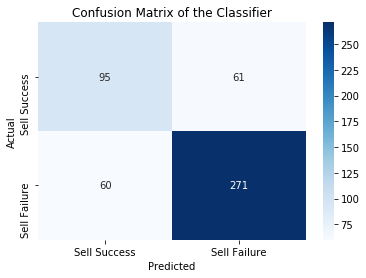

In [26]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logr_tuned_pred,
          labels = ['Sell Success', 'Sell Failure'])

<strong>Model 2: KNN Classification   (With Distance Standardization) </strong>

The User Defined Function optimal_neighbors() is used to find the optimal neighbors for the KNN Model.

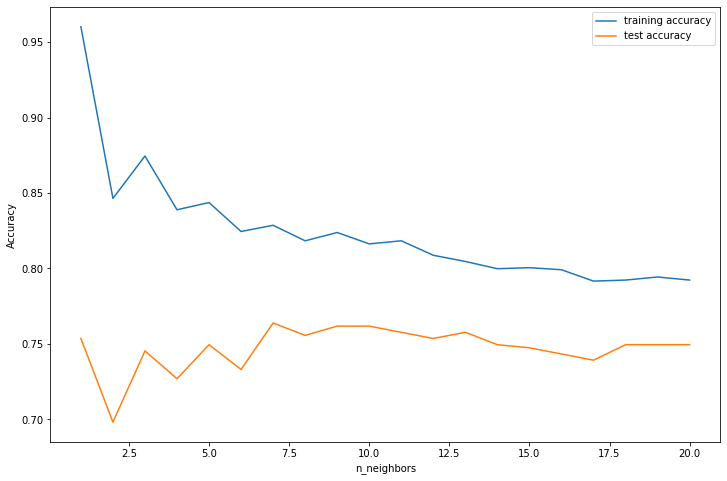

The optimal number of neighbors is: 7


In [27]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data = chef_data,
                                  y_data = chef_target,
                                  response_type= 'class')

After Standardization of the training data using StandardScaler, we are running the KNN Model. Since KNN works on finding the smallest distance, distance standardization helps to improve the model. The KNN Model is overfitting and has lower AUC Score.

In [28]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chef_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(chef_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled_df,
                                                                                chef_target,
                                                                                random_state = 222,
                                                                                test_size = 0.25,
                                                                                stratify = chef_target)
                                                                                

# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


knn_train_score = knn_fit.score(X_train, y_train).round(4)
knn_test_score  = knn_fit.score(X_test, y_test).round(4)
knn_AUC_score   = roc_auc_score(y_true  = y_test,
                                y_score = knn_pred).round(4)

Training ACCURACY: 0.8163
Testing  ACCURACY: 0.7536
AUC Score        : 0.7035


Confusion Matrix:

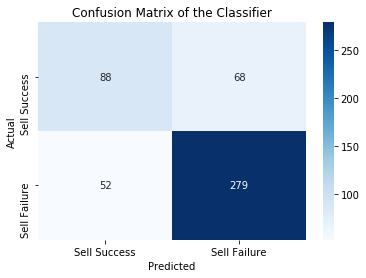

In [29]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Sell Success', 'Sell Failure'])

<strong>Model 3: Decision Tree Classification </strong>

Here, we are using the Pruned Tree where we can get maximum insights for the business than a full tree. 

In [30]:
# INSTANTIATING a classification tree object
tree_pruned  = DecisionTreeClassifier(max_depth = 4,
                                      min_samples_leaf = 25,
                                      random_state = 222)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))

dtree_train_score = tree_pruned_fit.score(X_train, y_train).round(4)
dtree_test_score  = tree_pruned_fit.score(X_test, y_test).round(4)
dtree_AUC_score   = roc_auc_score(y_true  = y_test,
                                       y_score = tree_pruned_pred).round(4)

Training ACCURACY: 0.804
Testing  ACCURACY: 0.7721
AUC Score        : 0.7561


This confusion matrix shows better predictive power of the model but on comparing with above models we can also notice that the model predicted a higher sell success when the actual was a sell failure. It is still better that the model maintains a lower sell failure predictions when it was really a success. 

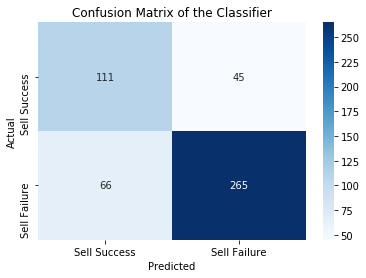

In [31]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = tree_pruned_pred,
          labels = ['Sell Success', 'Sell Failure'])

Now, we are tuning the model using GridSearchCV with 3 Fold Cross-validation to see results. 

In [32]:
## building a model based on hyperparameter tuning results (GridSearchCV - 3 Fold Cross-Validation)

# declaring a hyperparameter space

criterion_space = ["gini", "entropy"]
max_depth_space = np.arange(1,15,1)
min_samples_split_space = np.arange(2,50)


# creating a hyperparameter grid

param_grid = {'criterion': criterion_space,
               'max_depth': max_depth_space,
               'min_samples_split' : min_samples_split_space}


# INSTANTIATING the model object 

dtree_model = DecisionTreeClassifier(random_state = 222)


# GridSearchCV object

dtree_cv = GridSearchCV(dtree_model, 
                        param_grid, 
                        cv=3,
                        scoring = make_scorer(roc_auc_score,
                                              needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)

dtree_cv.fit(chef_data,chef_target)


# re-building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
dtree_tuned = dtree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
dtree_tuned_pred = dtree_tuned.predict(X_test)


# SCORING the model
print('Training ACCURACY:', dtree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', dtree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = dtree_tuned_pred).round(4))

dtree_tuned_train_score = dtree_tuned.score(X_train, y_train).round(4)
dtree_tuned_test_score  = dtree_tuned.score(X_test, y_test).round(4)
dtree_tuned_AUC_score   = roc_auc_score(y_true  = y_test,
                                       y_score = dtree_tuned_pred).round(4)

Training ACCURACY: 0.9109
Testing  ACCURACY: 0.9076
AUC Score        : 0.91


After tuning the results, in this confusion matrix we can observe that the predictive power of the model has gone very high. Also, now the model is having very low values of false positive and false negative as compared to other models. 

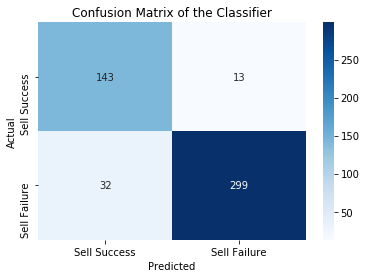

In [33]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = dtree_tuned_pred,
          labels = ['Sell Success', 'Sell Failure'])

In this plot we can see that FOLLOWED_RECOMMENDATIONS_PCT, TOTAL_PHOTOS_VIEWED, CANCELLATIONS_BEFORE_NOON and junk are important features that affect CROSS_SELL_SUCCESS. Even though we lack data in identifying male and female gender from the dataset, we can also infer that male tend to have more success. This can be explored more in the future with better data.  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:196: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


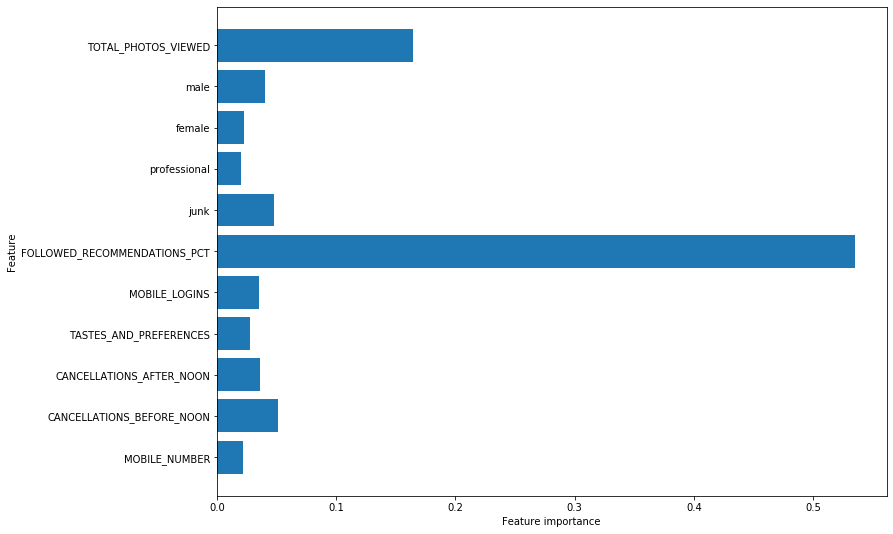

In [34]:
# plotting feature importance
plot_feature_importances(dtree_tuned,
                         train = X_train,
                         export = False)

Even though the tree has more depth and very difficult to interpret, we are able to gain insights from feature importance and the confusion matrix. Also, the model is performing well so we would keep this depth according to the GridSearchCV.

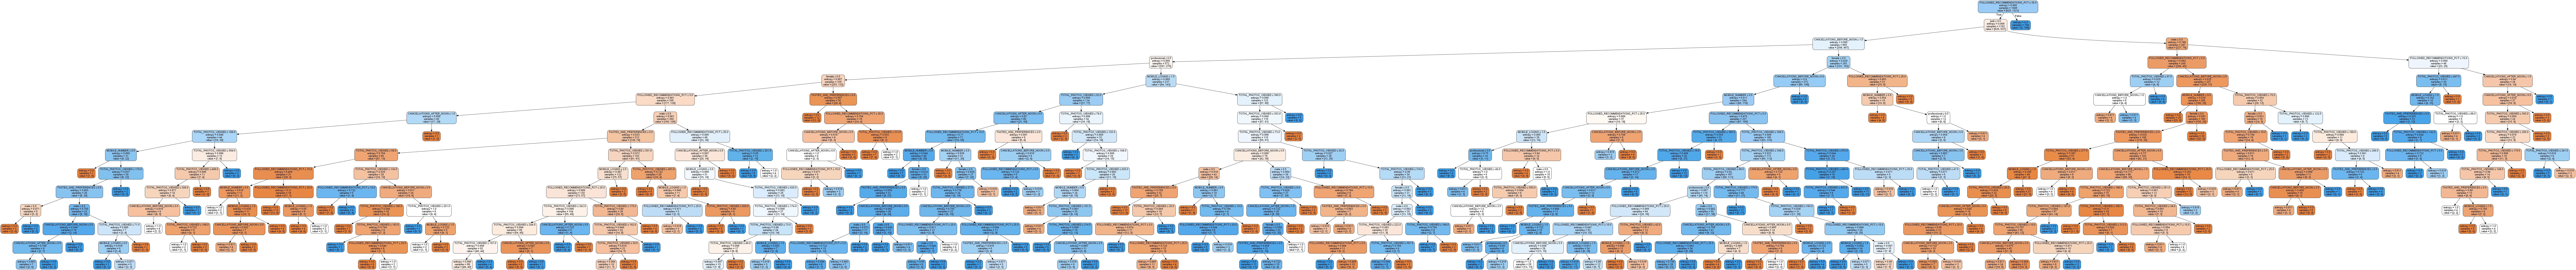

In [35]:
# displaying the tree
display_tree(tree       = dtree_tuned,
             feature_df = X_train)

<strong>Model 4: Random Forest  (Ensemble Model) </strong>

In this model, max_depth is set to 4 with all the default values on the hyperparameters. Thus, the model uses pruned trees for prediction which reduces overfitting and could also help generate good insights on the features.

In [36]:
# INSTANTIATING a random forest model (Pruned Trees)
rf_pruned = RandomForestClassifier(n_estimators     = 10,
                                    criterion        = 'gini',
                                    max_depth        = 4,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 222)

# FITTING the training data
rf_pruned_fit = rf_pruned.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_pruned_fit_pred = rf_pruned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rf_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_pruned_fit_pred).round(4))

rf_train_score = rf_pruned_fit.score(X_train, y_train).round(4)
rf_test_score  = rf_pruned_fit.score(X_test, y_test).round(4)
rf_AUC_score   = roc_auc_score(y_true  = y_test,
                                       y_score = rf_pruned_fit_pred).round(4)

Training ACCURACY: 0.8163
Testing  ACCURACY: 0.7823
AUC Score        : 0.7179


Confusion Matrix:

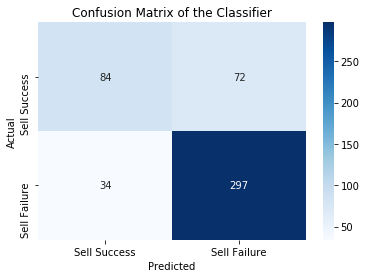

In [37]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = rf_pruned_fit_pred,
          labels = ['Sell Success', 'Sell Failure'])

Now, we are tuning the model using GridSearchCV with 3 Fold Cross-validation to see results. While using optimal set of parameters from GridSearchCV, max_depth is tuned manually to control overfitting by pruning the trees. This model performance is fairly better. 

In [38]:
# INSTANTIATING the model object by manually inputting the optimal set 
full_rf_tuned = RandomForestClassifier(max_depth        = 5,  
                                       bootstrap        = False,
                                       criterion        = 'entropy',
                                       min_samples_leaf = 1,
                                       n_estimators     = 850,
                                       warm_start       = True,
                                       random_state     = 222)


# FIT step is needed as we are not using .best_estimator
full_rf_tuned_fit = full_rf_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
full_rf_tuned_pred = full_rf_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', full_rf_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', full_rf_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_rf_tuned_pred).round(4))

rf_tuned_train_score = full_rf_tuned_fit.score(X_train, y_train).round(4)
rf_tuned_test_score  = full_rf_tuned_fit.score(X_test, y_test).round(4)
rf_tuned_AUC_score   = roc_auc_score(y_true  = y_test,
                                       y_score = full_rf_tuned_pred).round(4)

Training ACCURACY: 0.8314
Testing  ACCURACY: 0.807
AUC Score        : 0.7665


Confusion Matrix:

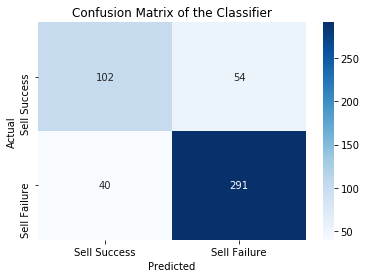

In [39]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = full_rf_tuned_pred,
          labels = ['Sell Success', 'Sell Failure'])

<strong>Model 5: Gradient Boosting  (Ensemble Model) </strong>

In this model, we are using default values to instantiate the model and see performance.

In [40]:
# INSTANTIATING the model object by manually inputting the optimal set
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 222)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(X_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

gb_train_score = full_gbm_default_fit.score(X_train, y_train).round(4)
gb_test_score  = full_gbm_default_fit.score(X_test, y_test).round(4)
gb_AUC_score   = roc_auc_score(y_true  = y_test,
                                       y_score = full_gbm_default_pred).round(4)

Training ACCURACY: 0.8554
Testing ACCURACY : 0.8008
AUC Score        : 0.7704


Confusion Matrix:

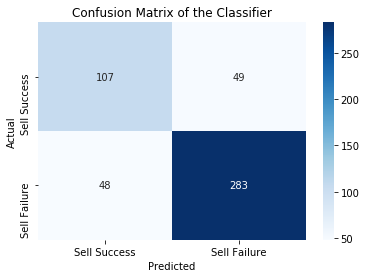

In [41]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = full_gbm_default_pred,
          labels = ['Sell Success', 'Sell Failure'])

Now, we are tuning the model using GridSearchCV with 3 Fold Cross-validation to see results. While using optimal set of parameters from GridSearchCV learning_rate is tuned manually to control overfitting. It is kept at a lower value to get more robust models. There is not much change by tuning the model.

In [42]:
# INSTANTIATING the model object without hyperparameters
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.045,
                                       max_depth     = 2,
                                       n_estimators  = 200,
                                       random_state  = 222)


# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

gb_tuned_train_score = gbm_tuned_fit.score(X_train, y_train).round(4)
gb_tuned_test_score  = gbm_tuned_fit.score(X_test, y_test).round(4)
gb_tuned_AUC_score   = roc_auc_score(y_true  = y_test,
                                     y_score = gbm_tuned_pred).round(4)

Training ACCURACY: 0.8321
Testing  ACCURACY: 0.8049
AUC Score        : 0.7735


Confusion Matrix:

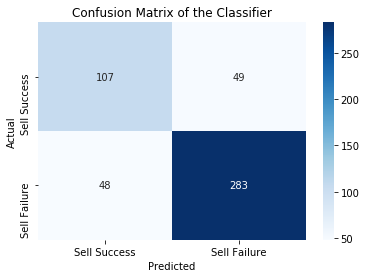

In [43]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = full_gbm_default_pred,
          labels = ['Sell Success', 'Sell Failure'])

<h3>Section 4 | Final Model Based on Model Performance </h3>

Here, we can see that Decision Tree Model after hyperparameter tuning is the best model with a very high performance of AUC Score 0.91. All the models are fairly performing better with no overfitting in most cases. Thus, we can be confident on identifying features that affect CROSS_SELL_SUCCESS based on these models and make our business decisions.

In [44]:
# comparing results

# creating a dictionary for model results
model_performance = {'Model'    : ['logr', 'logr_tuned', 'KNN', 
                                   'DTree', 'DTree_tuned', 
                                   'RF', 'RF_tuned',
                                   'GB', 'GB_tuned'],
           
                     'Training' : [logr_train_score, logr_tuned_train_score,
                                   knn_train_score,dtree_train_score,
                                   dtree_tuned_train_score,rf_train_score,
                                   rf_tuned_train_score,gb_train_score,
                                   gb_tuned_train_score],
           
                     'Testing'  : [logr_test_score,logr_tuned_test_score,
                                   knn_test_score,dtree_test_score,
                                   dtree_tuned_test_score,rf_test_score,
                                   rf_tuned_test_score,gb_test_score,
                                   gb_tuned_test_score],
                     
                     'AUC Value'      : [logr_AUC_score,logr_tuned_AUC_score,
                                   knn_AUC_score,dtree_AUC_score,
                                   dtree_tuned_AUC_score,rf_AUC_score,
                                   rf_tuned_AUC_score,gb_AUC_score,
                                   gb_tuned_AUC_score]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# Displaying model_performance
model_performance.sort_values(by = 'AUC Value',
                              ascending = False)

Model  Training  Testing  AUC Value
4  DTree_tuned    0.9109   0.9076     0.9100
8     GB_tuned    0.8321   0.8049     0.7735
7           GB    0.8554   0.8008     0.7704
6     RF_tuned    0.8314   0.8070     0.7665
3        DTree    0.8040   0.7721     0.7561
5           RF    0.8163   0.7823     0.7179
0         logr    0.7752   0.7515     0.7139
1   logr_tuned    0.7766   0.7515     0.7139
2          KNN    0.6813   0.6715     0.7035